In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from trw_raw_to_tables import *
from climate.dendroclim import get_crn_climate_correlation, plot_daily_dendroclim, plot_mothly_dendroclim
from climate.trend_plots import plot_measurements, plot_measurement, plot_measurements_by_measure
from utils.functions import dropna_pearsonr
from utils.df_preprocessing import rotate_daily_climate, fill_missing_dates, monthly_climate_offset_and_clean

pd.options.mode.chained_assignment = None  # default='warn'

# Загрузка данных

## Чокурдах

In [2]:
mean_rh_C = pd.read_csv('input/climate/real/relative humidity/RH_Chokurdakh.csv').drop(['Индекс ВМО'], axis=1)
mean_sol_C = pd.read_csv('input/climate/real/sunshine duration/SD_Chokurdakh.csv').drop(['Индекс ВМО'], axis=1).replace(9999, np.nan)

mean_temp_C = pd.read_csv('input/climate/real/temperature/Temp_Chokurdakh.csv').drop(['Индекс ВМО'], axis=1)
mean_prec_C = pd.read_csv('input/climate/real/precipitation/Prec_Chokurdakh.csv').drop(['Индекс ВМО'], axis=1)
mean_vpd_C = pd.read_csv('input/climate/real/vpd/VPD_Chokurdakh.csv').drop(['Индекс ВМО'], axis=1)

climate_C = pd.read_csv('input/climate/real/daily/Daily_Chokurdakh.csv').drop(['Индекс ВМО',
'Общий признак качества температур', 'Минимальная температура воздуха', 'Максимальная температура воздуха'], axis=1)

grid_temp_C = pd.read_csv('input/climate/grid/temperature/Grid_Temp_Chokurdakh.csv')
grid_prec_C = pd.read_csv('input/climate/grid/precipitation/Grid_Prec_Chokurdakh.csv')
grid_vp_C = pd.read_csv('input/climate/grid/vpd/Grid_VP_Chokurdakh.csv')

## Хатанга

In [3]:
mean_rh_H = pd.read_csv('input/climate/real/relative humidity/RH_Khatanga.csv').drop(['Индекс ВМО'], axis=1)
mean_sol_H = pd.read_csv('input/climate/real/sunshine duration/SD_Khatanga.csv').drop(['Индекс ВМО'], axis=1).replace(9999, np.nan)

mean_temp_H = pd.read_csv('input/climate/real/temperature/Temp_Khatanga.csv').drop(['Индекс ВМО'], axis=1)
mean_prec_H = pd.read_csv('input/climate/real/precipitation/Prec_Khatanga.csv').drop(['Индекс ВМО'], axis=1)
mean_vpd_H = pd.read_csv('input/climate/real/vpd/VPD_Khatanga.csv').drop(['Индекс ВМО'], axis=1)

climate_H = pd.read_csv('input/climate/real/daily/Daily_Khatanga.csv').drop(['Индекс ВМО',
'Общий признак качества температур', 'Минимальная температура воздуха', 'Максимальная температура воздуха'], axis=1)

grid_temp_H = pd.read_csv('input/climate/grid/temperature/Grid_Temp_Khatanga.csv')
grid_prec_H = pd.read_csv('input/climate/grid/precipitation/Grid_Prec_Khatanga.csv')
grid_vp_H = pd.read_csv('input/climate/grid/vpd/Grid_VP_Khatanga.csv')

## Инувик

In [4]:
mean_rh_I = pd.read_csv('input/climate/real/relative humidity/RH_Inuvik.csv')

mean_temp_I = pd.read_csv('input/climate/real/temperature/Temp_Inuvik.csv')
mean_prec_I = pd.read_csv('input/climate/real/precipitation/Prec_Inuvik.csv')
mean_vpd_I = pd.read_csv('input/climate/real/vpd/VPD_Inuvik.csv')

climate_I = pd.read_csv('input/climate/real/daily/Daily_Inuvik.csv')

grid_temp_I = pd.read_csv('input/climate/grid/temperature/Grid_Temp_Inuvik.csv')
grid_prec_I = pd.read_csv('input/climate/grid/precipitation/Grid_Prec_Inuvik.csv')
grid_vp_I = pd.read_csv('input/climate/grid/vpd/Grid_VP_Inuvik.csv')

# Построение трендов

Станции вместе

In [ ]:
plot_measurements_by_measure([mean_temp_C, mean_temp_H, mean_temp_I], ['Chokurdakh', 'Khatanga', 'Inuvik'], 'Temperature', '(°C)', [1901, 1980], [1979, 2020], xticks=range(1910, 2020, 30))
plot_measurements_by_measure([mean_prec_C, mean_prec_H, mean_prec_I], ['Chokurdakh', 'Khatanga', 'Inuvik'], 'Precipitation', '(mm)', [1901, 1980], [1979, 2020])
plot_measurements_by_measure([mean_vpd_C, mean_vpd_H, mean_vpd_I], ['Chokurdakh', 'Khatanga', 'Inuvik'], 'Vapour pressure deficit', '(mbar)', [1901, 1980], [1979, 2020])

Отдельно

In [6]:
plot_measurements(mean_vpd_C, 'Chokurdakh', 'Vapour pressure deficit (mbar)', [1901, 1980], [1979, 2020])
plot_measurements(mean_temp_C, 'Chokurdakh', 'Temperature (°C)', [1901, 1980], [1979, 2020])
plot_measurements(mean_prec_C, 'Chokurdakh', 'Precipitation (mm)', [1901, 1980], [1979, 2020])

In [7]:
plot_measurements(mean_vpd_H, 'Khatanga', 'Vapour pressure deficit (mbar)', [1901, 1980], [1979, 2020])
plot_measurements(mean_temp_H, 'Khatanga', 'Temperature (°C)', [1901, 1980], [1979, 2020])
plot_measurements(mean_prec_H, 'Khatanga', 'Precipitation (mm)', [1901, 1980], [1979, 2020])

In [8]:
plot_measurements(mean_prec_I, 'Inuvik', 'Precipitation (mm)', [1901, 1980], [1979, 2020])
plot_measurements(mean_vpd_I, 'Inuvik', 'Vapour pressure deficit (mbar)', [1901, 1980], [1979, 2020])
plot_measurements(mean_temp_I, 'Inuvik', 'Temperature (°C)', [1901, 1980], [1979, 2020])

### Остальные тренды

In [ ]:
plot_measurements(mean_rh_C, 'Chokurdakh', 'Relative humidity (%)', [1901, 1980], [1979, 2020])
plot_measurements(mean_sol_C, 'Chokurdakh', 'Sunshine duration (DOY)', [1901, 1980], [1979, 2020])
plot_measurements(mean_rh_H, 'Khatanga', 'Relative humidity (%)', [1901, 1980], [1979, 2020])
plot_measurements(mean_sol_H, 'Khatanga', 'Sunshine duration (DOY)', [1901, 1980], [1979, 2020])
plot_measurements(mean_rh_I, 'Inuvik', 'Relative humidity (%)', [1901, 1980], [1979, 2020])

# Красивое представление корреляций

ПЕРЕД ТЕМ КАК ЗАПУСКАТЬ ЭТОТ КУСОК НУЖНО УДАЛИТЬ СТАРЫЕ ТАБЛИЦЫ ТРЕНДОВ

In [9]:
dfs = []
for station in ['Chokurdakh', 'Khatanga', 'Inuvik']:
    dfs += [pd.read_csv(f'output/{station}_trends.csv')]

df = pd.concat(dfs).reset_index(drop=True).replace('Temperature (�C)', 'Temperature (°C)')

In [37]:
years = ['1901-1979', '1980-2020', '1901-2020']
seasons = ['Annual', 'Spring', 'Summer', 'Autumn', 'Winter']
measurements = ['Temperature (°C)', 'Precipitation (mm)', 'Vapour pressure deficit (mbar)']
stations = ['Chokurdakh', 'Khatanga', 'Inuvik']

colums = [[list((mes, per)) for per in years] for mes in measurements]
colums = [item for sublist in colums for item in sublist]

indexes = [[list((stat, seas)) for seas in seasons] for stat in stations]
indexes = [item for sublist in indexes for item in sublist]

In [47]:
colums_df = pd.DataFrame(colums, columns=["Measure", "Period"])
indexes_df = pd.DataFrame(indexes, columns=["Station", "Season"])

In [48]:
s1_table = pd.DataFrame(columns=pd.MultiIndex.from_frame(colums_df), index=pd.MultiIndex.from_frame(indexes_df))

In [71]:
for mes in measurements:
     for per in years:
         for seas in seasons:
             for stat in stations:
                temp_df = df[(df['station']==stat) & (df['mes']==mes) & (df['season']==seas) & (df['years']==per)][['correlation', 'p-vaule']]
                s1_table.loc[(stat, seas), (mes, per)] = f"{sum(temp_df['correlation'].values)}\n(p={sum(temp_df['p-vaule'].values):0.2f})"

In [73]:
s1_table.to_excel('output/Table S1.xlsx')

# Общие графики

## Климатика

In [95]:
months_names = ['J', 'F', 'M', 'A', 'M ', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

In [96]:
def plot_all_mean_climate(climate, ste):
    # Чокурдах с 1944 по 2021
    # Хатанга с 1929 по 2021
    for year in set(climate['Год']):
        temp_mean = []
        prec_sum = []
        for month in range(1,13):
            df = climate[(climate['Год']==year) & (climate['Месяц']==month)]
            temp_mean += [df.mean(skipna=True)['Средняя температура воздуха']]
            prec_sum += [df.sum(skipna=True)['Количество осадков']]
        
        fig, ax1 = plt.subplots(figsize=(6,5))
        plt.subplots_adjust(right=0.9)
        ax1.set_title(year)
        ax1.set_xlabel('Month')
        ax1.set_ylabel('Precipitation (mm)')
        ax1.bar([i for i in range(1,13)], prec_sum, color='lightgray', linewidth=1, edgecolor='black')
        ax1.set_ylim([0, 90])
        ax2 = ax1.twinx()
        ax2.set_ylabel('Temperature (°C)')
        ax2.plot([i for i in range(1,13)], temp_mean, color='black', linewidth=2)
        ax2.set_xticks([i for i in range(1,13)])
        ax2.set_ylim([-40, 20])
        ax2.set_xticklabels(months_names)
        plt.savefig(f'output/{year}.png', dpi=100)
        plt.close(fig)

## Месячные данные

In [97]:
# 'Sunshine duration (DOY)' [0, 450]
# 'Vapour pressure deficit (kPa?)' [0, 13]
# 'Relative humidity (%)' [50, 100]

def plot_all_mean_meas(df, ylim, title):
    for year in df['Год']:
        fig, ax = plt.subplots(figsize=(6,5))
        plt.subplots_adjust(right=0.9)
        ax.set_title(year)
        ax.set_xlabel('Month')
        ax.set_ylabel(title)
        ax.set_ylim(ylim)
        ax.set_xlim([0, 13])
        ax.plot([i for i in range(1,13)], list(df[df['Год'] == year].drop(['Год'], axis=1).iloc[0]), color='black', linewidth=2)
        ax.set_xticks([i for i in range(1,13)])
        ax.set_xticklabels(months_names)
        plt.savefig(f'output/{year}.png', dpi=100)
        plt.close(fig)

# Сравнение с гридами

In [98]:
mon_ru = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
mon_en = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
mon_dict = {en:ru for en, ru in zip(mon_en, mon_ru)}

In [5]:
def compare_dfs(df1, df2):
    years = list(set(df1['Year']) & set(df2['Year']))
    min_y, max_y = years[0], years[-1]
    corrs = dict()

    for month in range(1,13):
        x_ = df1[(df1['Year']>=min_y) & (df1['Year']<=max_y)].iloc[:,month]
        y_ = df2[(df2['Year']>=min_y) & (df2['Year']<=max_y)].iloc[:,month]
        corrs[month] = dropna_pearsonr(x_, y_)
    
    return corrs

def compare_to_xlsx(df1, df2, name):
    corrs = pd.DataFrame(compare_dfs(df1, df2))
    corrs = corrs.transpose()
    corrs = corrs.rename(columns={0:'Корреляция', 1:'p-value'})
    wr = 'output/DF_Comparison.xlsx'
    try:
        with pd.ExcelWriter(wr, mode='a') as writer:
            corrs.to_excel(writer, sheet_name=name)
    except FileNotFoundError:
        corrs.to_excel(wr, sheet_name=name)

In [24]:
compare_to_xlsx(grid_temp_C, mean_temp_C, 'Chok_Temp')
compare_to_xlsx(grid_prec_C, mean_prec_C, 'Chok_Prec')
compare_to_xlsx(grid_temp_H, mean_temp_H, 'Khat_Temp')
compare_to_xlsx(grid_prec_H, mean_prec_H, 'Khat_Prec')

In [25]:
compare_to_xlsx(grid_temp_I, mean_temp_I, 'Inuvik_Temp')
compare_to_xlsx(grid_prec_I, grid_prec_I, 'Inuvik_Prec')

In [11]:
def plot_mean_ds(df1, df2, title, l1, l2, ylim, ylabel='', xlabel='Year', ax=None):
    year_df1 = pd.DataFrame({'Year':df1['Year']})
    year_df2 = pd.DataFrame({'Year':df2['Year']})
    
    df1 = monthly_climate_offset_and_clean(df1).reset_index(drop=True)
    df2 = monthly_climate_offset_and_clean(df2).reset_index(drop=True)
    df1 = year_df1.join(df1.set_index('Year'), on='Year', how='left')
    df2 = year_df2.join(df2.set_index('Year'), on='Year', how='left')
    m1 = df1.iloc[:, range(1, 13)].mean(axis=1, skipna=True)
    m2 = df2.iloc[:, range(1, 13)].mean(axis=1, skipna=True)
    new_df1 = pd.DataFrame({'year':df1['Year'], 'mean1':m1})
    new_df2 = pd.DataFrame({'year':df2['Year'], 'mean2':m2})
    temp_df = new_df1.merge(new_df2, on='year')
    #print(temp_df.drop(['year'], axis=1).corr())
    r, p = dropna_pearsonr(temp_df['mean1'], temp_df['mean2'])
    if not ax:
        fig, ax = plt.subplots(figsize=(8,5))
        plt.subplots_adjust(right=0.9)
    
    ax.plot(df1['Year'], m1, label=l1)
    ax.plot(df2['Year'], m2, label=l2)
    ax.legend(frameon=False)
    if not ax:
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_xlim([1900, 2021])
        ax.set_ylim(ylim)
        ax.set_ylabel(ylabel)
        plt.savefig(f'output/{title}_{ylabel}.png', dpi=100)
        plt.close(fig)
    print(f'{title}, {ylabel}, r={r:0.3f}, p={p:0.4f}')

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey='row', dpi=300, figsize=(12, 8))
plt.subplots_adjust(hspace=0.06, wspace=0.06)
plot_mean_ds(grid_temp_C, mean_temp_C, 'Chokurdakh', 'Grid', 'Real', [-18, -4], 'Average temperature (°C)', ax=axes[0, 0])
plot_mean_ds(grid_prec_C, mean_prec_C, 'Chokurdakh', 'Grid', 'Real', [5, 40], 'Average precipitation (mm)', ax=axes[1, 0])
plot_mean_ds(grid_vp_C, mean_vpd_C, 'Chokurdakh', 'Grid', 'Real', [1,5],  'Average vapour pressure deficit (mbar)', ax=axes[2, 0])
plot_mean_ds(grid_temp_H, mean_temp_H, 'Khatanga', 'Grid', 'Real', [-18, -4], 'Average temperature (°C)', ax=axes[0, 1])
plot_mean_ds(grid_prec_H, mean_prec_H, 'Khatanga', 'Grid', 'Real', [5, 40], 'Average precipitation (mm)', ax=axes[1, 1])
plot_mean_ds(grid_vp_H, mean_vpd_H, 'Khatanga', 'Grid', 'Real', [1,5], 'Average vapour pressure deficit (mbar)', ax=axes[2, 1])
plot_mean_ds(grid_temp_I, mean_temp_I, 'Inuvik', 'Grid', 'Real', [-18, -4], 'Average temperature (°C)', ax=axes[0, 2])
plot_mean_ds(grid_prec_I, mean_prec_I, 'Inuvik', 'Grid', 'Real', [5, 40], 'Average precipitation (mm)', ax=axes[1, 2])
plot_mean_ds(grid_vp_I, mean_vpd_I, 'Inuvik', 'Grid', 'Real', [1,5], 'Average vapour pressure deficit (mbar)', ax=axes[2, 2])

axes[0, 0].set_title('Chokurdakh')
axes[0, 1].set_title('Khatanga')
axes[0, 2].set_title('Inuvik')

axes[0, 0].set_ylabel('Average temperature (°C)')
axes[1, 0].set_ylabel('Average precipitation\n (mm)')
axes[2, 0].set_ylabel('Average\n vapour pressure deficit\n (mbar)')
for i in range(3):
    axes[2, i].set_xlabel('Year')
plt.savefig(f'output/Figure S1.png', dpi=300)
plt.close(fig)

Chokurdakh, Average temperature (°C), r=0.904, p=0.0000
Chokurdakh, Average precipitation (mm), r=0.217, p=0.1223
Chokurdakh, Average vapour pressure deficit (mbar), r=0.338, p=0.0040
Khatanga, Average temperature (°C), r=0.903, p=0.0000
Khatanga, Average precipitation (mm), r=0.906, p=0.0000
Khatanga, Average vapour pressure deficit (mbar), r=0.749, p=0.0000
Inuvik, Average temperature (°C), r=0.925, p=0.0000
Inuvik, Average precipitation (mm), r=0.653, p=0.0000
Inuvik, Average vapour pressure deficit (mbar), r=0.324, p=0.0117


# Вычисление VPD из ежечасных данных

In [2]:
inuvik_monthly = pd.read_excel('input/old/Канада/Инувик/По Месяцам/INUVIK_A_1958-2020_MONTHLY.xlsx')

In [5]:
from climate.weather_gc_ca import montly_to_measurement

In [2]:
def celsius_to_fahrenheit(x):
    return x * 9/5 + 32

def celsius_to_rankine(x):
    return x * 9/5 + 32 + 459.67

In [3]:
def get_e_mb(T):
    return 6.1078 * np.e ** ((17.269 * T) / (273.3 + T))


def get_dew_point_temp(T, RH):
    X = np.log(RH / 100) + (17.269 * T) / (237.3 + T)
    return (273.3 * X) / (17.269 - X)


def get_vpd(T, RH):
    return get_e_mb(T) - get_e_mb(get_dew_point_temp(T, RH))

In [ ]:
montly_to_measurement(df, 'Rel Hum (%)').to_csv('INUVIK_A_RELATIVE_HUM.csv', index=False)

In [59]:
df['VPD (mbar)'] = get_e_mb(df['Temp (°C)']) - get_e_mb(df['Dew Point Temp (°C)'])

In [ ]:
pearsonr(get_e_mb(df['Temp (°C)']) - get_e_mb(df['Dew Point Temp (°C)']), get_vpd(df['Temp (°C)'], df['Rel Hum (%)']))

(0.9857251541183312, 0.0)

In [ ]:
def csv_to_xlsx(path):
    path = path.replace('\\','/')
    df = pd.read_csv(path)
    df.to_excel(path.split('.')[0]+'.xlsx', index=False)

def csv_to_climexp(path):
    path = path.replace('\\','/')
    df = pd.read_csv(path)
    df = df.replace(np.nan, -999.9)
    df = df.drop(['Индекс ВМО'], axis=1)
    df.to_csv(path.split('.')[0]+'.txt', index=None, sep=' ')

In [ ]:
csv_to_climexp('input\Чокурдах и Хатанга\csv\Чокурдах_Упругость_водяного_пара.csv')

# Дендроклим

## Таймыр \ Хатанга (temp, prec, VPD)

In [ ]:
trw_tay = pd.read_excel('input/Хронологии/Таймыр/TAY_chr.xlsx').drop(0)
trw_tay = trw_tay.drop(len(trw_tay))

In [ ]:
months = ["Январь", "Февраль", "Март", "Апрель",
 "Май", "Июнь", "Июль", "Август",
  "Сентябрь", "Октябрь", "Ноябрь", "Декабрь"]

In [ ]:
        #ps1 = [f'p={v:0.03f}' if v <0.05 else '' for v in ps[key]]
        #for i, txt in enumerate(ps1):
        #    add = .01 if rs[key][i] > 0 else -.04
        #    ax.annotate(txt, (i-.5, rs[key][i]+add))

In [ ]:
plot_mothly_dendroclim(trw_tay,
                       [mean_prec_H.rename(columns={'Год':'Year'}),
                       mean_temp_H.rename(columns={'Год':'Year'}),
                       mean_vpd_H.rename(columns={'Год':'Year'})],
                       ['Precipitation', 'Temperature', 'VPD'],
                       ['blue', 'red', 'green'], 'Khatanga-Taymyr')

(<Figure size 432x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Khatanga-Taymyr'}, xlabel='Months', ylabel='Pearson R'>)

In [ ]:
plot_mothly_dendroclim(trw_tay, [grid_prec_H.rename(columns={'Год':'Year'}), grid_temp_H.rename(columns={'Год':'Year'})], ['Precipitation', 'Temperature'], ['blue', 'red'],'Grid Khatanga-Taymyr')

(<Figure size 432x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Grid Khatanga-Taymyr'}, xlabel='Months', ylabel='Pearson R'>)

In [ ]:
temperature, precipitation = rotate_daily_climate(climate_H.rename(columns={'Год':'Year', 'Месяц':'Month', 'День':'Day', 'Средняя температура воздуха':'Temp', 'Количество осадков':'Prec'}))

In [ ]:
t, p = get_crn_climate_correlation(temperature.drop([2020], axis=1),
                                   precipitation.drop([2020], axis=1),
                                   trw_tay[trw_tay['Year']>=1928]['TAY_std'], 0,0,
                                   grab=150, window=10)

# Хатанга с 1928 по 2019 (92 года)

In [ ]:
plot_daily_dendroclim(t, p, 'Khatanga-Taymyr', p_val=.21, p_label='<0.05')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Khatanga-Taymyr'}, xlabel='Month', ylabel='Pearson R'>)

## Инувик (temp, prec)

In [ ]:
trw_I = pd.read_csv('input/Хронологии/Канада/MDTM_tabs.csv')[['year', 'std']]

In [ ]:
plot_mothly_dendroclim(trw_I.rename(columns={'year':'Year'}),
                      [grid_prec_I.rename(columns={'Год':'Year'}),
                       grid_temp_I.rename(columns={'Год':'Year'})],
                       ['Precipitation', 'Temperature'],
                       ['blue', 'red'], 'Grid Inuvik')

In [ ]:
temp_df = fill_missing_dates(pd.read_csv('input/Канада/Инувик/По Дням/from_dat_INUVIK_TEMP_DAILY.csv'))
prec_df = fill_missing_dates(pd.read_csv('input/Канада/Инувик/По Дням/from_dat_INUVIK_PREC_DAILY.csv'))

In [ ]:
new_df = temp_df[['Year', 'Month', 'Day', 'Temp']]
new_df['Prec'] = prec_df[prec_df['Year']<=temp_df['Year'].max()]['Prec']

In [ ]:
temp, prec = rotate_daily_climate(new_df)

In [ ]:
t, p = get_crn_climate_correlation(temp.drop([2009, 2010, 2011, 2012, 2013], axis=1),
                                   prec.drop([2009, 2010, 2011, 2012, 2013], axis=1),
                                   list(trw_I[(trw_I['year']>=1957) & (trw_I['year']<=2013)]['std']),
                                   0 , 0, grab=150)

# Инувик -- климатика с 1957 по 2008 52 (года)

In [ ]:
plot_daily_dendroclim(t, p, 'Inuvik', p_val=.275, p_label='p<0.05')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Inuvik'}, xlabel='Month', ylabel='Pearson R'>)

## Котуй

In [8]:
trw_K = pd.read_csv('input/Хронологии/kot20/KOT20_tabs', sep='\t')[['year', 'std']]

In [13]:
fig, ax, rs, ps = plot_mothly_dendroclim(trw_K.rename(columns={'year':'Year'}),
                      [mean_prec_H.rename(columns={'Год':'Year'}),
                       mean_temp_H.rename(columns={'Год':'Year'}),
                       mean_vpd_H.rename(columns={'Год':'Year'})],
                       ['Precipitation', 'Temperature', 'VPD'],
                       ['blue', 'red', 'green'], 'Kotuy-Khatanga')

In [18]:
def save_r_table(rs, ps, file_name=''):
    r_table = dict()

    for r in rs.keys():
        r_table[f'{r} R'] = rs[r]

    for p in ps.keys():
        r_table[f'{p} p-value'] = ps[p]

    pd.DataFrame(r_table).to_excel(f'output/{file_name}_pearson.xlsx', index=False)

In [19]:
save_r_table(rs, ps, 'TRW_Kotuy-Khatanga')

## Якутия

In [9]:
trw_Ind = pd.read_csv('input/Хронологии/ind/ind09_tabs', sep='\t')[['year', 'std']]

In [20]:
fig, ax, rs, ps = plot_mothly_dendroclim(trw_Ind.rename(columns={'year':'Year'}),
                      [mean_prec_C.rename(columns={'Год':'Year'}),
                       mean_temp_C.rename(columns={'Год':'Year'}),
                       mean_vpd_C.rename(columns={'Год':'Year'})],
                       ['Precipitation', 'Temperature', 'VPD'],
                       ['blue', 'red', 'green'], 'Yakutia-Chokurdakh')

In [21]:
save_r_table(rs, ps, 'TRW_Yakutia-Chokurdakh')

## d18O

In [5]:
d18O = pd.read_excel('input/d18O.xlsx')
d18O_c = pd.read_excel('input/Canada_18O_Porter.xlsx')

In [104]:
plot_mothly_dendroclim(d18O[['Year', 'd18O_CAN']],
                      [grid_prec_I.rename(columns={'Год':'Year'}),
                       grid_temp_I.rename(columns={'Год':'Year'})],
                       ['Precipitation', 'Temperature'],
                       ['blue', 'red'], 'd18O Inuvik')

(<Figure size 432x360 with 1 Axes>,
 <AxesSubplot:title={'center':'d18O Inuvik'}, xlabel='Months', ylabel='Pearson R'>)

In [6]:
fig, ax, rs, ps = plot_mothly_dendroclim(d18O_c,
                      [grid_prec_I.rename(columns={'Год':'Year'}),
                       grid_temp_I.rename(columns={'Год':'Year'})],
                       ['Precipitation', 'Temperature'],
                       ['blue', 'red'], 'd18O Inuvik')

In [8]:
pd.DataFrame(rs).to_excel('output/O18_Inuvil_pearson_r.xlsx', index=False)
pd.DataFrame(ps).to_excel('output/O18_Inuvil_pearson_p.xlsx', index=False)

In [12]:
fig, ax, rs, ps = plot_mothly_dendroclim(d18O[['Year', 'd18OTAY']],
                       [mean_prec_H.rename(columns={'Год':'Year'}),
                       mean_temp_H.rename(columns={'Год':'Year'}),
                       mean_vpd_H.rename(columns={'Год':'Year'})],
                       ['Precipitation', 'Temperature', 'VPD'],
                       ['blue', 'red', 'green'], 'd18O Khatanga')

pd.DataFrame(rs).to_excel('output/O18_Khatanga_pearson_r.xlsx', index=False)
pd.DataFrame(ps).to_excel('output/O18_Khatanga_pearson_p.xlsx', index=False)

In [13]:
fig, ax, rs, ps = plot_mothly_dendroclim(d18O[['Year', 'd18OYAK']],
                       [mean_prec_C.rename(columns={'Год':'Year'}),
                       mean_temp_C.rename(columns={'Год':'Year'}),
                       mean_vpd_C.rename(columns={'Год':'Year'})],
                       ['Precipitation', 'Temperature', 'VPD'],
                       ['blue', 'red', 'green'], 'd18O Chokurdakh')

pd.DataFrame(rs).to_excel('output/O18_Chokurdakh_pearson_r.xlsx', index=False)
pd.DataFrame(ps).to_excel('output/O18_Chokurdakh_pearson_p.xlsx', index=False)

# Таблицы пропусков:

In [30]:
c_n = ['Station', 'Time period', 'Source'] + list('JFMAMJJASOND')
names = ['Chokurdakh', 'Khatanga', 'Inuvik']
temps = [mean_temp_C, mean_temp_H, mean_temp_I]
precs = [mean_prec_C, mean_prec_H, mean_prec_I]
vpds = [mean_vpd_C, mean_vpd_H, mean_vpd_I]

temps_sources = ['http://meteo.ru/', 'http://meteo.ru/', 'Means from hourly data from https://climate.weather.gc.ca/historical_data/search_historic_data_e.html']
precs_sources = ['http://meteo.ru/', 'http://meteo.ru/', 'https://climexp.knmi.nl/getprcp.cgi?WMO=71957']
vpds_sources = ['http://meteo.ru/', 'http://meteo.ru/', 'Calculated from https://climate.weather.gc.ca/historical_data/search_historic_data_e.html air temperature and dew point temperature']

In [83]:
def count_nans(df):
    return list(df.count()[1:]), df.count()['Год'], df['Год'].min(), df['Год'].max()


def get_nan_table(datas, sources, persent: bool):
    temp_table = []

    for i in range(len(datas)):
        mon_len, total_years, min_y, max_y = count_nans(datas[i])
        if persent:
            mon_len = [1-m/total_years for m in mon_len]
        temp_l = [names[i], f'{min_y}-{max_y}', sources[i]] + mon_len
        temp_table += [temp_l]

    temp_table = np.array(temp_table)
    return pd.DataFrame(data=temp_table, columns=c_n)

In [84]:
get_nan_table(temps, temps_sources, True).to_excel('output/temp_data_completeness_%.xlsx', index=False)
get_nan_table(precs, precs_sources, True).to_excel('output/prec_data_completeness_%.xlsx', index=False)
get_nan_table(vpds, vpds_sources, True).to_excel('output/vpd_data_completeness_%.xlsx', index=False)

# Корреляция d18O с климатикой

Чокурдах -- Якутия

Хатанга -- Таймыр

Инувик -- Канада

In [13]:
d18O = pd.read_excel('input/d18O.xlsx')

In [14]:
from utils.df_preprocessing import monthly_climate_offset_and_clean

season_names = {
    1: 'spring',
    2: 'summer',
    3: 'autumn',
    4: 'winter'
}

cols = {
    1: [3, 4, 5],
    2: [6, 7, 8],
    3: [9, 10, 11],
    4: [1, 2, 12]
}


def correlate_d18_with_df(clim_df, d18_df, label):
    temp_df = pd.merge(clim_df, d18_df, how ='inner', on =['Year'])
    temp_df = monthly_climate_offset_and_clean(temp_df)
    
    month_corrs = dict()
    for col in clim_df.columns:
        if col == 'Year':
            continue
        month_corrs[col] = dropna_pearsonr(temp_df[col], temp_df[label])
    season_means = dict()
    for i in range(1, 5):
        temp_clim = temp_df.iloc[:,cols[i]].mean(axis=1, skipna=True)
        season_means[season_names[i]] = dropna_pearsonr(temp_clim, temp_df[label])
    
    to_del = ['Year'] + list(d18_df.columns)
    to_del.remove(label)
    return (pd.DataFrame(month_corrs, index=[label + ' r', label + ' p-value']),
            pd.DataFrame(season_means, index=[label + ' r', label + ' p-value']))


In [16]:
temp_yak_month_corr, temp_yak_seas_corr = correlate_d18_with_df(mean_temp_C, d18O, 'd18O_YAK')
temp_tay_month_corr, temp_tay_seas_corr = correlate_d18_with_df(mean_temp_H, d18O, 'd18O_TAY')
temp_can_month_corr, temp_can_seas_corr = correlate_d18_with_df(mean_temp_I, d18O, 'd18O_CAN')

In [17]:
pd.concat([temp_yak_month_corr, temp_tay_month_corr, temp_can_month_corr]).to_excel('output/d18O_temperature_monthly_correlations.xlsx')
pd.concat([temp_yak_seas_corr, temp_tay_seas_corr, temp_can_seas_corr]).to_excel('output/d18O_temperature_seasonly_correlations.xlsx')

In [18]:
prec_yak_month_corr, prec_yak_seas_corr = correlate_d18_with_df(mean_prec_C, d18O, 'd18O_YAK')
prec_tay_month_corr, prec_tay_seas_corr = correlate_d18_with_df(mean_prec_H, d18O, 'd18O_TAY')
prec_can_month_corr, prec_can_seas_corr = correlate_d18_with_df(mean_prec_I, d18O, 'd18O_CAN')

In [19]:
pd.concat([prec_yak_month_corr, prec_tay_month_corr, prec_can_month_corr]).to_excel('output/d18O_precipitation_monthly_correlations.xlsx')
pd.concat([prec_yak_seas_corr, prec_tay_seas_corr, prec_can_seas_corr]).to_excel('output/d18O_precipitation_seasonly_correlations.xlsx')

In [20]:
vpd_yak_month_corr, vpd_yak_seas_corr = correlate_d18_with_df(mean_vpd_C, d18O, 'd18O_YAK')
vpd_tay_month_corr, vpd_tay_seas_corr = correlate_d18_with_df(mean_vpd_H, d18O, 'd18O_TAY')
vpd_can_month_corr, vpd_can_seas_corr = correlate_d18_with_df(mean_vpd_I, d18O, 'd18O_CAN')

In [21]:
pd.concat([vpd_yak_month_corr, vpd_tay_month_corr, vpd_can_month_corr]).to_excel('output/d18O_vpd_monthly_correlations.xlsx')
pd.concat([vpd_yak_seas_corr, vpd_tay_seas_corr, vpd_can_seas_corr]).to_excel('output/d18O_vpd_seasonly_correlations.xlsx')

# Вычисление сезона роста

In [17]:
def get_beginnings_of_growth_season(avg, val=5, years=None):
    res = []
    if not years:
        years = avg.columns
    for year in years:
        res += [avg.loc[(avg[year] >= val)][year].index[0]]
    return res

def get_endings_of_growth_season(avg, val=5, years=None):
    res = []
    if not years:
        years = avg.columns 
    for year in years:
        res += [avg.iloc[173:].loc[(avg[year] < val)][year].index[0]]
    return res

def get_rolling_mean(df, window=11):
    temp_df_1 = df[['Year', 'Month', 'Day']]
    temp_df_2 = df.rolling(window=window, center=True, min_periods=1).mean()
    temp_df_1['Temp (°C)'] = temp_df_2['Temp (°C)']
    return temp_df_1

In [21]:
climate_I_rolled = get_rolling_mean(climate_I)
climate_I_rolled = climate_I_rolled[climate_I_rolled['Year']>1958]

<ipython-input-17-9fd06bdf6841>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df_1['Temp (°C)'] = temp_df_2['Temp (°C)']


In [159]:
val = 5
starts = []
ends = []
for year in set(climate_I_rolled['Year']):
    avg = climate_I_rolled[climate_I_rolled['Year']==year].reset_index(drop=True)
    starts += [avg[avg['Temp (°C)']>val][['Month','Day']].iloc[0]._name]
    ends += [avg.iloc[173:][avg['Temp (°C)']<val][['Month','Day']].iloc[0]._name]

<ipython-input-159-4de62e7f59f1>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ends += [avg.iloc[173:][avg['Temp (°C)']<val][['Month','Day']].iloc[0]._name]
<ipython-input-159-4de62e7f59f1>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ends += [avg.iloc[173:][avg['Temp (°C)']<val][['Month','Day']].iloc[0]._name]
<ipython-input-159-4de62e7f59f1>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ends += [avg.iloc[173:][avg['Temp (°C)']<val][['Month','Day']].iloc[0]._name]
<ipython-input-159-4de62e7f59f1>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ends += [avg.iloc[173:][avg['Temp (°C)']<val][['Month','Day']].iloc[0]._name]
<ipython-input-159-4de62e7f59f1>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ends += [avg.iloc[173:][avg['Temp (°C)']<val][['Month','Day']].iloc[0]._name]
<ipython-input-159-4de62e7f59f1>:7: User

In [163]:
growth_season = {
    'Year': [],
    'Start': [],
    'End': []
}
for i, year in enumerate(set(climate_I_rolled['Year'])):
    growth_season['Year'] += [year]
    growth_season['Start'] += [starts[i]]
    growth_season['End'] += [ends[i]]

pd.DataFrame(growth_season).to_excel('output/growth_season.xlsx', index=False)

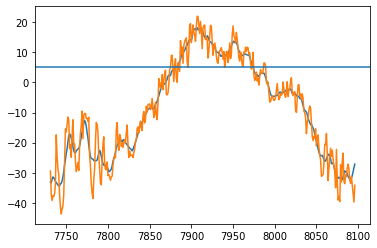

In [133]:
plt.plot(climate_I_rolled[climate_I_rolled['Year']==1980]['Temp (°C)'])
plt.plot(climate_I[climate_I['Year']==1980]['Temp (°C)'])
plt.axhline(5)

# Экспорт eps файлов из gz архивов

In [1]:
import gzip
import shutil
from os import listdir
from os.path import isfile, join

mypath = 'output/other_files/002 -- 07.09.2021 (обновлённые карты по гридам и d18O с единым промежутком)'

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

for f in onlyfiles:
    with gzip.open(f'{mypath}/{f}', 'rb') as f_in:
        temp = f.split(".")
        new_f = temp[0] + temp[1]
        with open(f'{mypath}/eps/{new_f}.eps', 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)


# Тренды для d18O

y=0.002x+16.35,0.09,0.4366
y=0.041x-60.82,0.56,0.0014


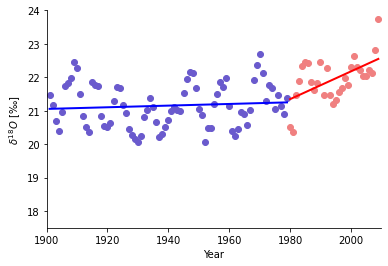

In [22]:
fig, ax = plt.subplots()
t1 = plot_measurement(pd.read_excel('input/d18O.xlsx', sheet_name=3), ax, 1901, 1979, '$δ^{18}O$ [‰]', 0, 'slateblue', False)
t2 = plot_measurement(pd.read_excel('input/d18O.xlsx', sheet_name=3), ax, 1980, 2020, '$δ^{18}O$ [‰]', 0, 'lightcoral', False)
ax.set_xlim([1900, 2010])
ax.set_ylim([17.5, 24])
ax.set_title('$δ^{18}O$  TAY annual', loc='left')
ax.set_title('', loc='left')
plt.savefig(f'output/d18O TAY annual.png', dpi=100)

y=0.003x+12.66,0.14,0.2223
y=0.018x-16.36,0.27,0.1927


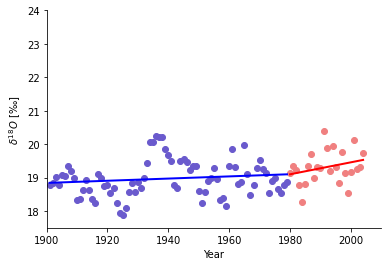

In [23]:
fig, ax = plt.subplots()
t1 = plot_measurement(pd.read_excel('input/d18O.xlsx', sheet_name=2), ax, 1901, 1979, '$δ^{18}O$ [‰]', 0, 'slateblue',True)
t2 = plot_measurement(pd.read_excel('input/d18O.xlsx', sheet_name=2), ax, 1980, 2020, '$δ^{18}O$ [‰]', 0, 'lightcoral', True)

ax.set_xlim([1900, 2010])
ax.set_ylim([17.5, 24])
ax.set_title('$δ^{18}O$ YAK annual', loc='left')
ax.set_title('', loc='left')
plt.savefig(f'output/d18O YAK annual.png', dpi=100)

y=0.004x+12.18,0.17,0.1454
y=0.045x-68.18,0.69,0.0002


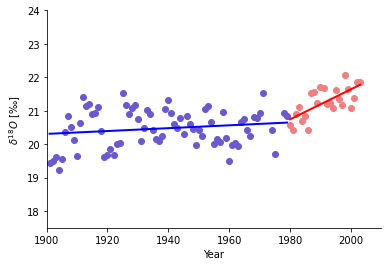

In [24]:
fig, ax = plt.subplots()
t1 = plot_measurement(pd.read_excel('input/d18O.xlsx', sheet_name=4), ax, 1901, 1979, '$δ^{18}O$ [‰]', 0, 'slateblue',False)
t2 = plot_measurement(pd.read_excel('input/d18O.xlsx', sheet_name=4), ax, 1980, 2020, '$δ^{18}O$ [‰]', 0, 'lightcoral', False)
ax.set_xlim([1900, 2010])
ax.set_ylim([17.5, 24])
ax.set_title('$δ^{18}O$ CAN annual', loc='left')
ax.set_title('', loc='left')
plt.savefig(f'output/d18O CAN annual.png', dpi=100)

# Расчёт изменения показателей по сезонам

In [6]:
season_names = {
    0: 'annual',
    1: 'spring',
    2: 'summer',
    3: 'autumn',
    4: 'winter'
}

cols = {
    0: range(1,13),
    1: [3, 4, 5],
    2: [6, 7, 8],
    3: [9, 10, 11],
    4: [1, 2, 12]
}

def compare_two_periods(data, start_years, end_years, season=0):
    mean = []
    for s_y, e_y in zip(start_years, end_years):
        _data = monthly_climate_offset_and_clean(data)
        _data = _data[(_data['Year']>=s_y) & (_data['Year']<=e_y)]
        means = _data.iloc[:,cols[season]].mean(axis=1, skipna=True)
        mean += [sum(means)/len(means)]
    return mean

In [7]:
stations = ['Chokurdakh', 'Khatanga', 'Inuvik']
measurements = ['Temperature', 'Precipitation', 'VPD']
datas = [
    [mean_temp_C, mean_temp_H, mean_temp_I],
    [mean_prec_C, mean_prec_H, mean_prec_I],
    [mean_vpd_C, mean_vpd_H, mean_vpd_I]
]
print('Station;Season;Temperature;Precipitation;VPD')

for i in range(3):
    for season in range(5):
        print(stations[i], end=';')
        print(season_names[season],end=';')
        for j in range(3):
            a, b = compare_two_periods(datas[j][i], [1901, 1980], [1979, 2020], season)
            print(f"{(b-a)/abs(a):0.2f}", end=';')
        print()

Station;Season;Temperature;Precipitation;VPD
Chokurdakh;annual;0.08;-0.16;0.06;
Chokurdakh;spring;0.06;-0.04;0.07;
Chokurdakh;summer;0.08;-0.23;0.03;
Chokurdakh;autumn;0.13;-0.08;0.12;
Chokurdakh;winter;0.03;-0.24;0.07;
Khatanga;annual;0.09;0.06;0.06;
Khatanga;spring;0.10;0.16;0.13;
Khatanga;summer;0.07;0.15;0.05;
Khatanga;autumn;0.07;-0.05;0.03;
Khatanga;winter;0.03;-0.02;0.06;
Inuvik;annual;0.21;-0.15;0.11;
Inuvik;spring;0.18;-0.14;0.33;
Inuvik;summer;0.06;-0.09;0.02;
Inuvik;autumn;0.17;-0.17;0.13;
Inuvik;winter;0.13;-0.25;1.10;


In [1]:
import pandas as pd

In [4]:
dep_daily = pd.read_csv('input/climate/real/daily/Daily_Deputatsky.txt', delimiter=';')

In [8]:
dep_daily.drop(columns=["Дополнительная характеристика", "Признак качества", "Признак качества.1", "Признак качества.2", "Признак качества.3"]).to_csv("Daily_Deputatsky.csv", index=False)